<a href="https://colab.research.google.com/github/goyaljai1/Data_Analysis_Projects/blob/main/Case_Study_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 6 - Udemy Courses Dataset

In [3]:
#importing dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d andrewmvd/udemy-courses

  0% 0.00/200k [00:00<?, ?B/s]
100% 200k/200k [00:00<00:00, 79.0MB/s]


In [5]:
!unzip "udemy-courses.zip"

Archive:  udemy-courses.zip
  inflating: udemy_courses.csv       


In [6]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("udemy_courses.csv")

In [8]:
#top 5 rows
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [9]:
#datatypes of each column 
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

We need to convert the "published_timestamp" column to datetime 64 datatype. We can do this while defining the dataframe.

In [10]:
df = pd.read_csv("udemy_courses.csv", parse_dates = ["published_timestamp"])
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [11]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [12]:
#duplicated values
df.duplicated().value_counts()

False    3672
True        6
dtype: int64

In [13]:
#viewing all the duplicates
df[df.duplicated(keep = False)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
778,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design


In [14]:
#dropping duplicated rows
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(3672, 12)

In [16]:
#number of courses per subject
df['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

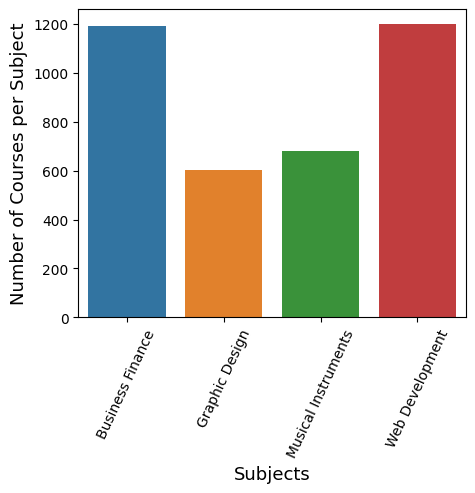

In [17]:
#graphical representation
plt.figure(figsize=(5, 4))
sns.countplot(data = df, x ='subject')
plt.xlabel("Subjects", fontsize = 13)
plt.ylabel("Number of Courses per Subject", fontsize = 13)
plt.xticks(rotation = 65)
plt.show()

In [18]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [19]:
#which course has more lecture paid or free
df_2 = df.groupby(['is_paid']).mean(numeric_only = True)
df_2.reset_index()

,is_paid,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
0,False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
1,True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


<Axes: xlabel='is_paid', ylabel='num_lectures'>

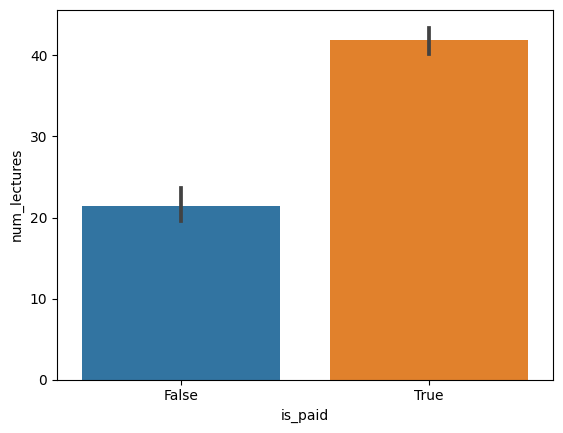

In [20]:
sns.barplot(data = df, x = 'is_paid', y = 'num_lectures')

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

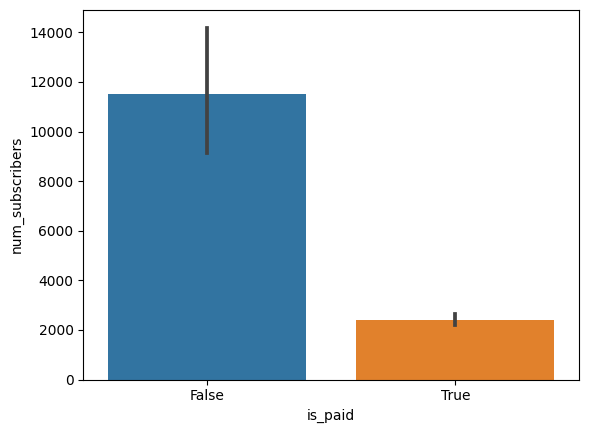

In [21]:
#which course has higher subscribers paid or free
sns.barplot(data = df, x = 'is_paid', y = 'num_subscribers')

In [22]:
#which level has the highest number of subscribers
df.groupby(df['level']).mean(numeric_only = True)

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
level,,,,,,,
All Levels,649372.988571,0.936623,73.090909,3569.761558,209.751688,46.030649,4.874000
Beginner Level,699269.822555,0.875394,55.737382,3195.459779,101.794164,33.022082,3.094401
Expert Level,705633.517241,1.000000,91.120690,865.448276,40.224138,30.775862,2.905460
Intermediate Level,722689.942993,0.928741,61.923990,1762.482185,92.674584,35.935867,3.733333


<Axes: xlabel='level', ylabel='num_subscribers'>

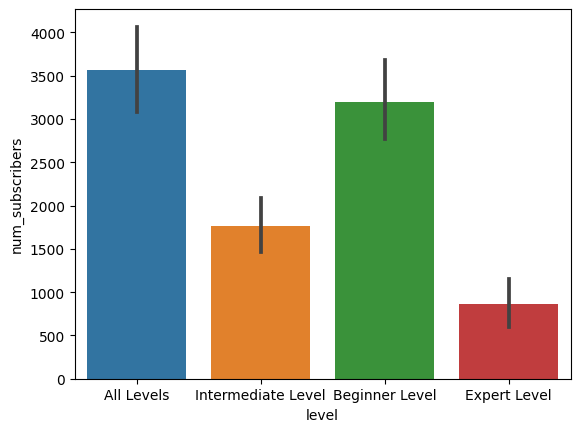

In [23]:
sns.barplot(data = df, x = 'level', y = 'num_subscribers')

In [24]:
#most popular course title
df[df['num_subscribers'].max() == df['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [25]:
#top 10 courses with highest number of subscribers
df.sort_values(by = "num_subscribers", ascending = False).head(10).course_title

2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
2783    Build Your First Website in 1 Week with HTML5 ...
3232                The Complete Web Developer Course 2.0
1896                Free Beginner Electric Guitar Lessons
2589    Web Design for Web Developers: Build Beautiful...
2619               Learn Javascript & JQuery From Scratch
3289    Practical PHP: Master the Basics and Code Dyna...
3247            JavaScript: Understanding the Weird Parts
Name: course_title, dtype: object

In [26]:
df_top = df.sort_values(by = "num_subscribers", ascending = False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

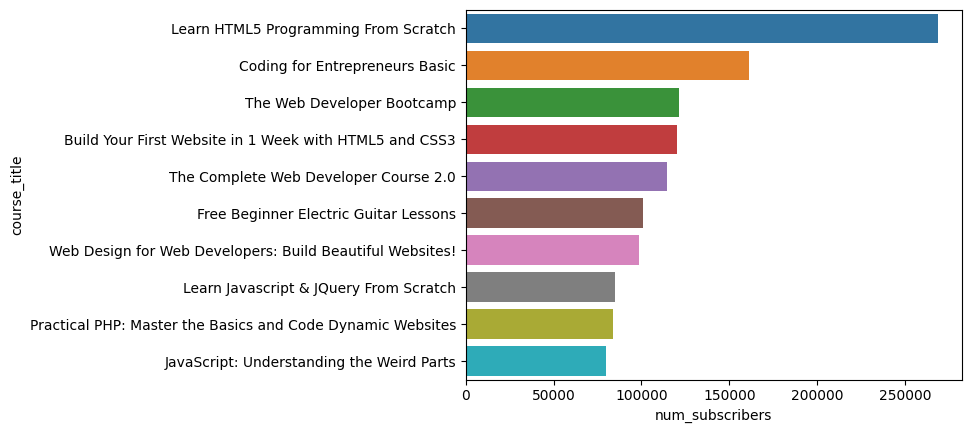

In [27]:
sns.barplot(x = 'num_subscribers', y = 'course_title', data = df_top)

In [28]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [29]:
#course having highest number of reviews
df[df["num_reviews"] == df["num_reviews"].max()]["course_title"]

3230    The Web Developer Bootcamp
Name: course_title, dtype: object

<Axes: xlabel='price', ylabel='num_reviews'>

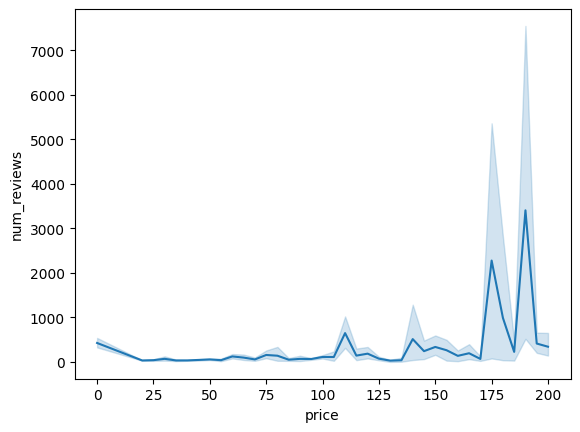

In [30]:
#does price affects number of reviews?

sns.lineplot(x="price", y="num_reviews", data = df)

Clearly, as the price of the course increases, number of reviews increases. (Dark blue line => mean value, shaded region => 95% bootstrapped value)

In [31]:
#total number of courses related to Python
df['course_title'].str.contains("python",case = False)

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Name: course_title, Length: 3672, dtype: bool

In [32]:
#display 10 most popular courses related to python based on number of subscribers
df[df['course_title'].str.contains('python', case = False)].sort_values(by = ['num_subscribers'],ascending = False).head(10).course_title

2497                          Web Programming with Python
2570    Coding for Entrepreneurs: Learn Python, Django...
2528          Learn Python and Django: Payment Processing
3200    Python and Django Full Stack Web Developer Boo...
3507    Fun and creative web engineering with Python a...
2553    The Complete Ethical Hacking Course 2.0: Pytho...
3138    Complete Python Web Course: Build 8 Python Web...
3197    Try Django 1.9 | Build a Blog and Learn Python...
2681    Python for Beginners: Python Programming Langu...
3203                      REST APIs with Flask and Python
Name: course_title, dtype: object

In [33]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [34]:
#year in which the highest number of courses were posted
df['year'] = df['published_timestamp'].dt.year

In [44]:
df['year'].value_counts().sort_values(ascending = False).head(1)

2016    1204
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='count'>

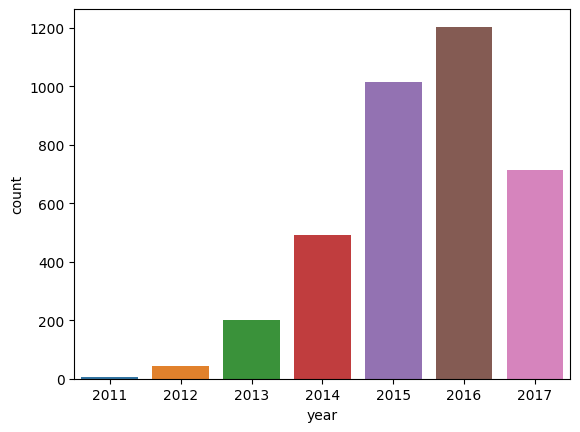

In [41]:
sns.countplot(data = df, x = 'year')

<Axes: xlabel='subject', ylabel='count'>

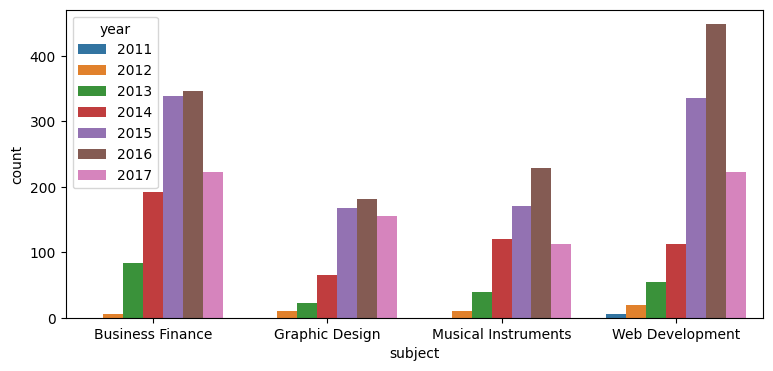

In [49]:
#category wise count of posted subjects year wise
plt.figure(figsize=(9, 4))
sns.countplot(data = df, x = 'subject', hue = 'year')